In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from obspy.signal.trigger import classic_sta_lta, trigger_onset

In [8]:

def apply_sta_lta(csv_file, sta_len=120, lta_len=600, sampling_rate=100, threshold=2.0):
    
    # Step 1: Read the CSV file
    data = pd.read_csv(csv_file)
    
    # Check if required columns are present in the CSV file
    if 'time_rel(sec)' not in data.columns or 'velocity(m/s)' not in data.columns:
        raise ValueError(f"CSV file {csv_file} must contain 'time_rel(sec)' and 'velocity(m/s)' columns.")
    
    # Step 2: Extract relevant columns
    rel_time = data['time_rel(sec)'].values  # Time data (X-axis)
    velocity = data['velocity(m/s)'].values  # Seismic amplitude or velocity (Y-axis)
    
    # Step 3: Calculate STA/LTA using Obspy's function
    sta_samples = int(sta_len * sampling_rate)  # Convert seconds to samples
    lta_samples = int(lta_len * sampling_rate)  # Convert seconds to samples
    
    # Apply classic STA/LTA to the velocity data
    cft = classic_sta_lta(velocity, sta_samples, lta_samples)
    
    # Step 4: Detect events based on the STA/LTA characteristic function
    onsets = trigger_onset(cft, threshold, threshold / 2)  # Get onset and end times of events
    
    # Step 5: Plot the characteristic function only where it's above the threshold
    
    # Create a masked array where the values below the threshold are hidden
    masked_cft = np.ma.masked_less(cft, threshold)
    
    plt.figure(figsize=(12, 5))
    
    # Plot only the part of the STA/LTA characteristic function above the threshold
    plt.plot(rel_time, masked_cft, 'b-', label='STA/LTA > Threshold')
    
    # Plot the threshold line
    plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
    
    # Mark detected events on the plot
    for onset in onsets:
        start_time = rel_time[onset[0]]
        plt.plot(start_time, threshold, 'go', markersize=10, label='Detected Event')  # Marker for detected event
    
    # Customize the plot
    plt.xlabel('Relative Time (s)')
    plt.ylabel('STA/LTA Ratio')
    plt.title('STA/LTA Model for Detecting Seismic Events')
    plt.xlim([min(rel_time), max(rel_time)])
    plt.legend()
    plt.grid(True)
    plt.show()


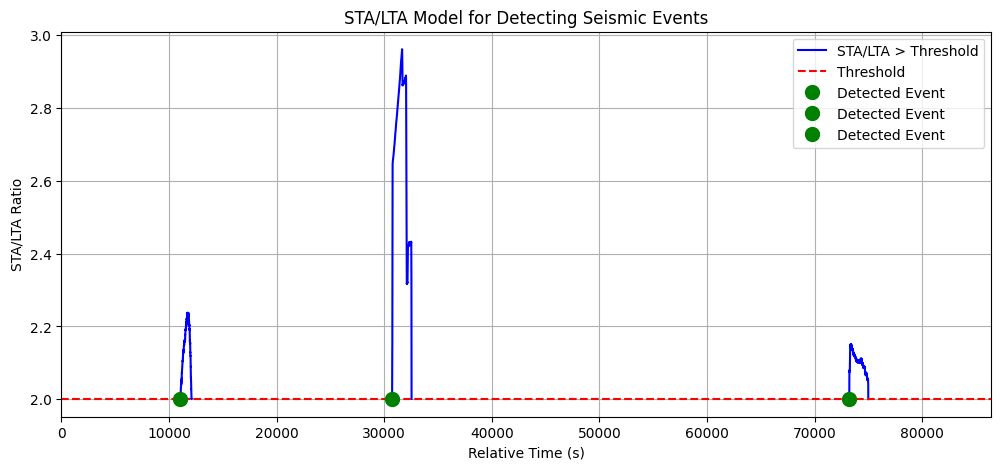

In [9]:
csv_file_path = 'archive/data/lunar/test/data/S16_GradeB/xa.s16.00.mhz.1973-08-25HR00_evid00443.csv'  # Replace with the actual path to your CSV file
apply_sta_lta(csv_file_path, sta_len=120, lta_len=600, sampling_rate=100)